In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('train.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,sms,label
1775,"Its ok chikku, and its my 1 of favourite song....",0
682,Ã log off 4 wat. It's sdryb8i\n,0
430,I wnt to buy a BMW car urgently..its vry urgen...,0
4303,Aiyar hard 2 type. U later free then tell me t...,0
1607,Ok no prob... I'll come after lunch then...\n,0
...,...,...
4262,Pls dont forget to study\n,0
150,Sindu got job in birla soft ..\n,0
282,"""Wen u miss someone, the person is definitely ...",0
231,Get down in gandhipuram and walk to cross cut ...,0


In [4]:
#No of a categories
len(set(df['label']))

2

In [5]:
df.groupby('label').label.count()

label
0    4827
1     747
Name: label, dtype: int64

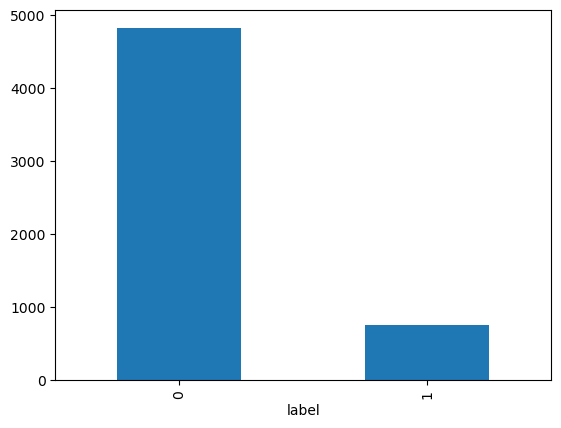

In [6]:
#Analyzing data
df.groupby('label').label.count().plot.bar()
plt.show()

In [7]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['sms'][0]).lower()
regs

'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat    '

In [8]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love comput'

In [10]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [12]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['sms']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

ValueError: Length of values (5570) does not match length of index (5574)